### Example Predicting digits using MNIST Dataset
<br>Carlos Estevez
<br>carlos@estevez.do
<br>https://github.com/carlosAtestevez


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

C:\Users\carlo\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
#Importing datasets
download_first_time = False #Only the first time
train_data = datasets.MNIST(root="./datasets",download=download_first_time,train=True,transform=transforms.ToTensor())
test_data = datasets.MNIST(root="./datasets",download=download_first_time,train=False,transform=transforms.ToTensor())
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)
test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [3]:
print(f"Shape training data {train_data.data.shape}")
print(f"Shape training data {test_data.data.shape}")

Shape training data torch.Size([60000, 28, 28])
Shape training data torch.Size([10000, 28, 28])


In [9]:
28*28

784

The image is a 1


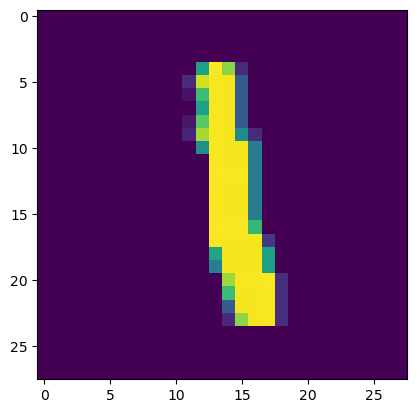

In [4]:
#Showing a testing image
x_test,y_test=train_data[6]
x_test.shape
x_test_format = x_test.reshape(28,28,1)
plt.imshow(x_test_format)
print(f"The image is a {y_test}")

In [7]:
#Designing Neural network
class EXMnist(nn.Module):

    def __init__(self,input_units=784,output_units=10,hidden_1_units = 100,hidden_2_units = 90):
        super().__init__()
        self.fc_hl1 = nn.Linear(input_units,hidden_1_units)
        self.fc_hl2 = nn.Linear(hidden_1_units,hidden_2_units)
        self.out_l = nn.Linear(hidden_2_units,output_units)

    def forward(self,X):
        X = F.relu(self.fc_hl1(X))
        X = F.relu(self.fc_hl2(X))
        X = self.out_l(X)
        return F.log_softmax(X, dim=1)
        

In [47]:
#Training Neural Network
modelEXMnist = EXMnist()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(modelEXMnist.parameters(),lr=0.01)

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for index_epoch in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for batch,(x_train,y_train) in enumerate(train_loader):
        batch+=1
        y_prediction = modelEXMnist(x_train.view(100,-1))
        loss = criterion(y_prediction, y_train)
        predicted = torch.max(y_prediction.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if batch%50 == 0:
            print(f'epoch: {index_epoch:2}  batch: {batch:4} [{100*batch:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*batch):7.3f}%')
    train_losses.append(loss)
    train_correct.append(trn_corr)



epoch:  0  batch:   50 [  5000/60000]  loss: 2.29108262  accuracy:  12.560%
epoch:  0  batch:  100 [ 10000/60000]  loss: 2.27034473  accuracy:  17.640%
epoch:  0  batch:  150 [ 15000/60000]  loss: 2.25959682  accuracy:  23.727%
epoch:  0  batch:  200 [ 20000/60000]  loss: 2.23181176  accuracy:  29.205%
epoch:  0  batch:  250 [ 25000/60000]  loss: 2.18008232  accuracy:  33.568%
epoch:  0  batch:  300 [ 30000/60000]  loss: 2.14440942  accuracy:  36.183%
epoch:  0  batch:  350 [ 35000/60000]  loss: 2.11763644  accuracy:  38.123%
epoch:  0  batch:  400 [ 40000/60000]  loss: 2.06956768  accuracy:  39.870%
epoch:  0  batch:  450 [ 45000/60000]  loss: 1.97870910  accuracy:  41.158%
epoch:  0  batch:  500 [ 50000/60000]  loss: 1.78927875  accuracy:  42.574%
epoch:  0  batch:  550 [ 55000/60000]  loss: 1.71357906  accuracy:  44.009%
epoch:  0  batch:  600 [ 60000/60000]  loss: 1.50341427  accuracy:  45.595%
epoch:  1  batch:   50 [  5000/60000]  loss: 1.49838638  accuracy:  68.160%
epoch:  1  b

In [69]:
# Run the testing batches
batch_size_test = 10000
test_loader_total = DataLoader(test_data,batch_size=batch_size_test,shuffle=False)
with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader_total):
        y_val = modelEXMnist(X_test.view(10000, -1))  # Here we flatten X_test
        predicted = torch.max(y_val.data, 1)[1] 
        correct_predictions = (predicted == y_test).sum()
        loss = criterion(y_val, y_test)
        print(f'loss: {loss.item():10.8f} accuracy: {correct_predictions.item()*100/(batch_size_test):7.3f}%')

loss: 0.26583028 accuracy:  92.530%


NameError: name 'modelEXMnist' is not defined

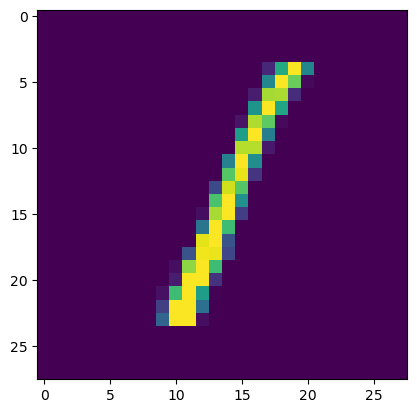

In [6]:
#Predicting Single Image

index_img = np.random.randint(0,10000)
x_test_ind,real_img = test_data[index_img]
x_test_img = x_test_ind.reshape(28,28)
plt.imshow(x_test_img)


#Predicting Digit
y_val_ind = modelEXMnist(x_test_ind.view(1, -1))  # Here we flatten X_test
predicted_digit = torch.max(y_val_ind .data, 1)[1] 

print(f"Real Digit: {real_img}, Predicted digit:{predicted_digit}")

